In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_timelinereport.parquet'

# 데이터 불러오기
timelinereport_df = pd.read_parquet(gcs_path, engine='pyarrow')
timelinereport_df

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
...,...,...,...,...,...,...
203,21857,선정적이거나 폭력적인 내용,2023-05-29 15:42:50,1479859,1402487,131364422
204,22634,허위 사실 언급,2023-05-31 10:33:00,1551005,1161757,135982670
205,22635,허위 사실 언급,2023-05-31 10:33:06,1551005,1161757,134909577
206,23022,선정적이거나 폭력적인 내용,2023-06-01 16:02:33,1479859,1498172,139837310


In [3]:
timelinereport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


In [4]:
timelinereport_df.isnull().sum()

id                         0
reason                     0
created_at                 0
reported_user_id           0
user_id                    0
user_question_record_id    0
dtype: int64

In [5]:
timelinereport_df.describe(include='all')

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
count,208.000000,208,208,2.080000e+02,2.080000e+02,2.080000e+02
unique,NaN,5,NaN,NaN,NaN,NaN
top,NaN,허위 사실 언급,NaN,NaN,NaN,NaN
freq,NaN,80,NaN,NaN,NaN,NaN
mean,9786.269231,NaN,2023-05-15 08:13:50.278846208,1.132497e+06,1.159946e+06,4.932558e+07
min,28.000000,NaN,2023-05-06 04:44:57,8.372350e+05,8.340890e+05,3.920588e+06
25%,6123.750000,NaN,2023-05-11 16:41:43.500000,9.664702e+05,9.671202e+05,2.461178e+07
50%,10095.000000,NaN,2023-05-15 01:23:29,1.144432e+06,1.184397e+06,4.740327e+07
75%,14182.250000,NaN,2023-05-18 18:01:18,1.225963e+06,1.291813e+06,7.179578e+07
max,23108.000000,NaN,2023-06-02 08:30:06,1.562736e+06,1.548002e+06,1.407659e+08


In [6]:
# 완전 중복 행 확인
duplicate_rows = timelinereport_df[timelinereport_df.duplicated()]
print(f"완전 중복 행 수: {len(duplicate_rows)}")

# 특정 key 기준 중복 (예: id 기준)
duplicate_ids = timelinereport_df[timelinereport_df.duplicated(subset='id')]
print(f"id 기준 중복 수: {len(duplicate_ids)}")

완전 중복 행 수: 0
id 기준 중복 수: 0


#### 신고 사유별 비율

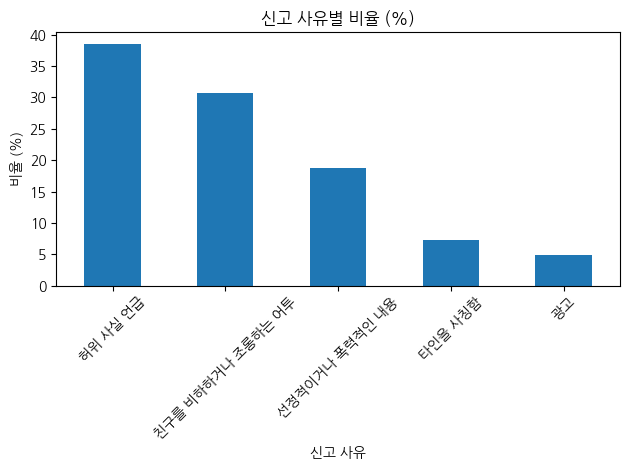

reason
허위 사실 언급             38.461538
친구를 비하하거나 조롱하는 어투    30.769231
선정적이거나 폭력적인 내용       18.750000
타인을 사칭함               7.211538
광고                    4.807692
Name: proportion, dtype: float64

In [9]:

# 비율 계산
reason_counts = timelinereport_df['reason'].value_counts(normalize=True) * 100


# 시각화
reason_counts.plot(kind='bar', title='신고 사유별 비율 (%)', ylabel='비율 (%)', xlabel='신고 사유', rot=45)
plt.tight_layout()
plt.show()


reason_counts

#### 사용자별 신고 누적 건수

reported_user_id
1138757    15
1156031     8
1187305     7
939196      7
1225963     6
885129      6
885473      5
1207784     4
1131675     4
1479859     3
Name: count, dtype: int64


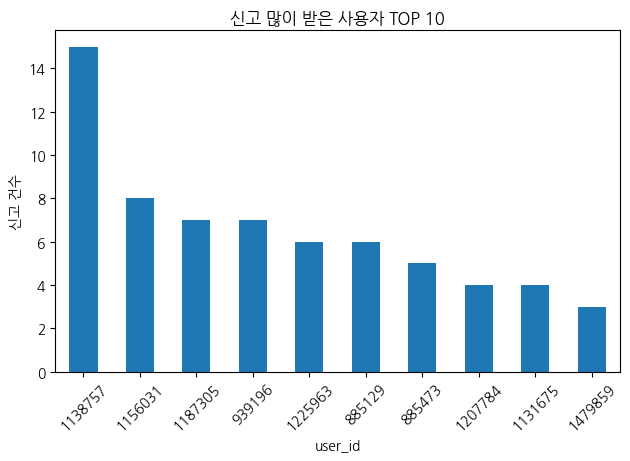

In [12]:
user_report_counts = timelinereport_df['reported_user_id'].value_counts()
print(user_report_counts.head(10))  # 상위 10명 출력

# 시각화 (상위 10명)
user_report_counts.head(10).plot(kind='bar', title='신고 많이 받은 사용자 TOP 10', ylabel='신고 건수', xlabel='user_id')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### 날짜별 신고 트렌드 시각화

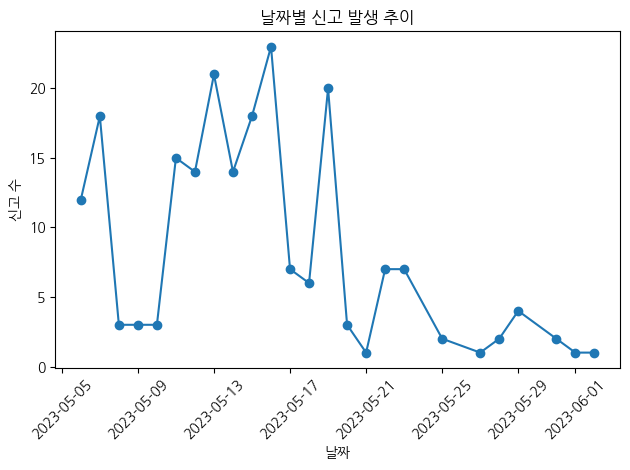

In [11]:
# datetime 형 변환
timelinereport_df['created_at'] = pd.to_datetime(timelinereport_df['created_at'])

# 날짜별 신고 수
daily_reports = timelinereport_df['created_at'].dt.date.value_counts().sort_index()

# 시각화
daily_reports.plot(kind='line', marker='o', title='날짜별 신고 발생 추이', ylabel='신고 수', xlabel='날짜')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 신고된 질문 기록 (user_question_record_id)의 중복 여부 확인

In [13]:
# 중복 질문 ID 확인
duplicate_questions = timelinereport_df['user_question_record_id'].duplicated().sum()
total_questions = timelinereport_df['user_question_record_id'].nunique()
print(f"중복된 질문 ID 수: {duplicate_questions}")
print(f"고유한 질문 ID 수: {total_questions}")


중복된 질문 ID 수: 45
고유한 질문 ID 수: 163
